## What to do when your data is too big
- Aggregate data (mean, percentiles etc)
- Samplea  random subset of data
- Don't collect so much data!

### Example
- A scatter plot of approval ratings
- Mean and median approval ratings

In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('obama.csv', parse_dates=['year_month'])
data.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,ABC/Post,80.0,15.0
1,2009-01-01,AP-GFK,74.0,15.0
2,2009-01-01,CNN,84.0,14.0
3,2009-01-01,Democracy Corps (D),51.0,20.0
4,2009-01-01,Diageo/Hotline,64.0,6.5


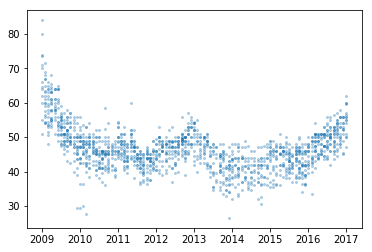

In [4]:
plt.plot(data.year_month, data.approve_percent, 'o', markersize=2, alpha=0.3)
plt.show()

In [10]:
data_mean = data.groupby('year_month').mean()
data_median = data.groupby('year_month').median()
data_mean.head()

,approve_percent,disapprove_percent
year_month,,
2009-01-01,67.307692,19.346154
2009-02-01,61.500000,26.289474
2009-03-01,57.842105,34.026316
2009-04-01,59.282609,33.195652
2009-05-01,58.966667,34.900000


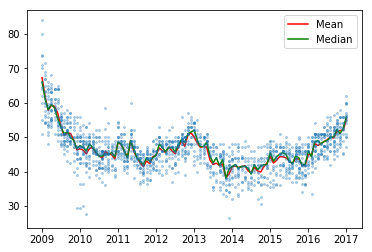

In [11]:
plt.plot(data_mean.index, data_mean.approve_percent, 'red')
plt.plot(data_median.index, data_median.approve_percent, 'green')
plt.legend(['Mean', 'Median'])
plt.plot(data.year_month, data.approve_percent, 'o', markersize=2, alpha=0.3)
plt.show()

In [13]:
data_25 = data.groupby('year_month').quantile(0.25)
data_75 = data.groupby('year_month').quantile(0.75)

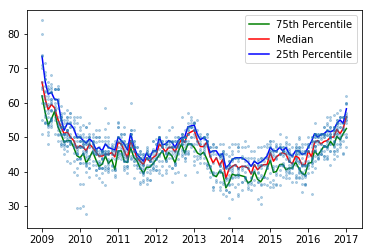

In [14]:
plt.plot(data_25.index, data_25.approve_percent, 'green')
plt.plot(data_median.index, data_median.approve_percent, 'red')
plt.plot(data_75.index, data_75.approve_percent, 'blue')
plt.plot(data.year_month, data.approve_percent, 'o', markersize=2, alpha=0.3)
plt.legend(['75th Percentile', 'Median', '25th Percentile'])
plt.show()

## A Random Sampling Example with Python

In [15]:
data_big = pd.read_csv('obama_too_big.csv', parse_dates=['year_month'])
data_big.head()

,year_month,survey_organization,approve_percent,disapprove_percent
0,2009-01-01,Generated Data,67.0,31.0
1,2009-01-01,Harris (Phone),60.0,29.0
2,2009-01-01,Generated Data,65.9,19.1
3,2009-01-01,Generated Data,64.6,18.4
4,2009-01-01,Generated Data,83.3,11.7


In [16]:
data.shape

(1530, 4)

In [17]:
data_big.shape

(65499, 4)

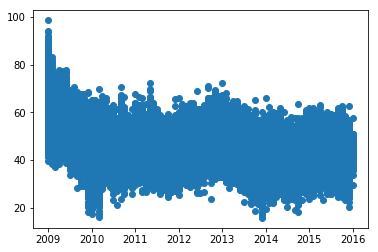

In [19]:
plt.plot(data_big.year_month, data_big.approve_percent, 'o')
plt.show()

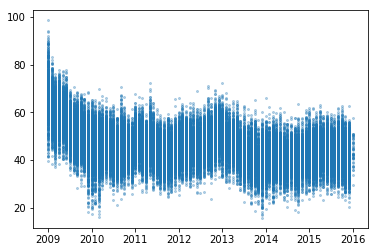

In [20]:
plt.plot(data_big.year_month, data_big.approve_percent, 'o', markersize=2, alpha=0.3)
plt.show()

In [24]:
# 10% of sample
sampled = data_big.sample(frac=0.1)

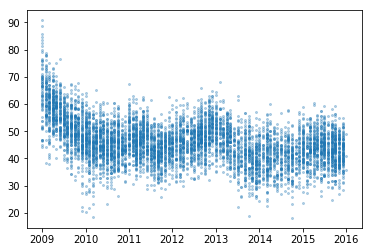

In [23]:
plt.plot(sampled.year_month, sampled.approve_percent, 'o', markersize=2, alpha=0.3)
plt.show()